In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [4]:
import glob
import joblib
import pandas as pd
#from pathlib import Path
import matplotlib.pyplot as plt

from phonetics import utils as u
from phonetics import phone_info as ph_i 
from phonetics import plots as plots
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [18]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/datasets'

In [20]:
path_sil_1 = f'{root}/songs/songs_output/silhouette_layers.csv'
df_sil = pd.read_csv(path_sil_1, index_col=0)

path_sil_2 = f'{root}/GTSinger_ES/GT_SingerES_output/silhouette_layers.csv'
df_sil_2 = pd.read_csv(path_sil_2, index_col=0)

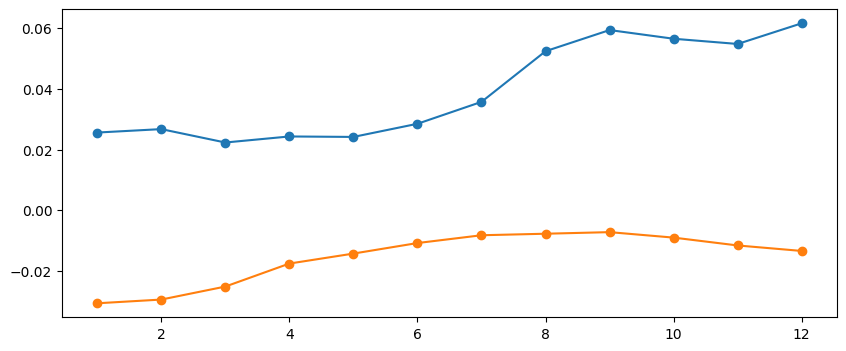

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df_sil['layer'], df_sil['silhouette'], '-o')
plt.plot(df_sil_2['layer'], df_sil_2['silhouette'], '-o')